In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz

In [17]:
# Load dataset
df = pd.read_csv('heart.csv')

In [18]:
# Preprocessing
# Features and target
X = df.drop('target', axis=1)
y = df['target']

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Step 1: Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

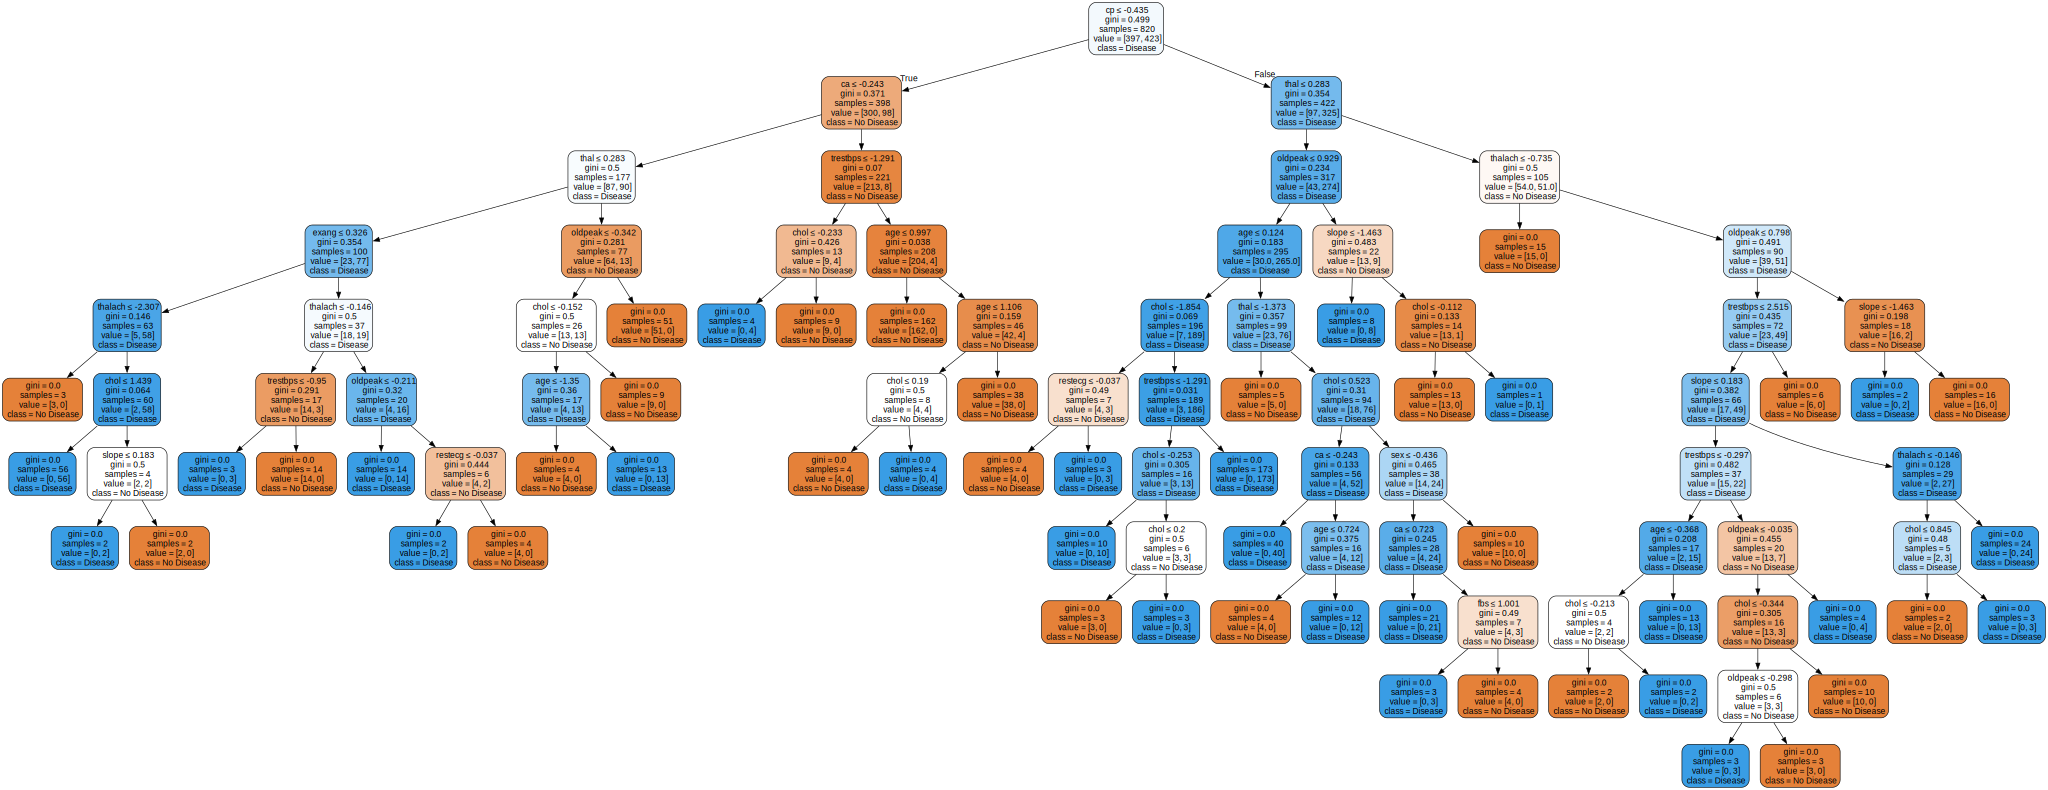

In [22]:
# Visualize Decision Tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['No Disease', 'Disease'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
display(graph)

In [23]:
# Step 2: Analyze overfitting by comparing train/test accuracy and controlling depth
train_accuracy = accuracy_score(y_train, dt.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, dt.predict(X_test_scaled))
print(f"Decision Tree - Train Accuracy: {train_accuracy:.4f}")
print(f"Decision Tree - Test Accuracy: {test_accuracy:.4f}")

Decision Tree - Train Accuracy: 1.0000
Decision Tree - Test Accuracy: 0.9854


In [24]:
# Control tree depth to reduce overfitting
dt_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_pruned.fit(X_train_scaled, y_train)
train_accuracy_pruned = accuracy_score(y_train, dt_pruned.predict(X_train_scaled))
test_accuracy_pruned = accuracy_score(y_test, dt_pruned.predict(X_test_scaled))
print(f"Pruned Decision Tree (max_depth=5) - Train Accuracy: {train_accuracy_pruned:.4f}")
print(f"Pruned Decision Tree (max_depth=5) - Test Accuracy: {test_accuracy_pruned:.4f}")

Pruned Decision Tree (max_depth=5) - Train Accuracy: 0.9293
Pruned Decision Tree (max_depth=5) - Test Accuracy: 0.8439


In [25]:
# Step 3: Train Random Forest and compare accuracy
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_accuracy = accuracy_score(y_test, rf.predict(X_test_scaled))
print(f"Random Forest - Test Accuracy: {rf_accuracy:.4f}")

Random Forest - Test Accuracy: 0.9854


In [26]:
# Additional evaluation metrics for Random Forest
y_pred_rf = rf.predict(X_test_scaled)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print("Random Forest - Confusion Matrix:")
print(cm_rf)

Random Forest - Precision: 1.0000
Random Forest - Recall: 0.9709
Random Forest - Confusion Matrix:
[[102   0]
 [  3 100]]


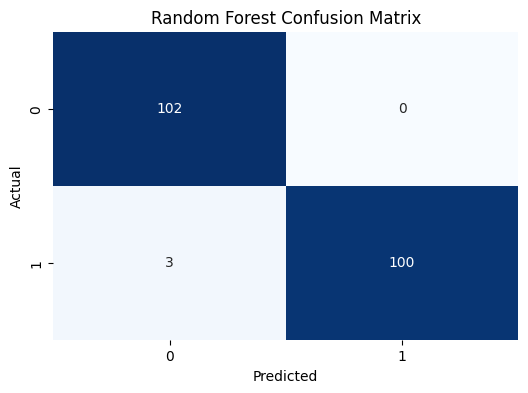

In [27]:
# Plot Random Forest confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# Step 4: Interpret feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print("\nFeature Importances (Random Forest):")
print(feature_importances)


Feature Importances (Random Forest):
     Feature  Importance
2         cp    0.135072
11        ca    0.127327
7    thalach    0.122169
9    oldpeak    0.121905
12      thal    0.110518
0        age    0.077908
4       chol    0.074822
3   trestbps    0.071171
8      exang    0.057594
10     slope    0.045782
1        sex    0.028731
6    restecg    0.018557
5        fbs    0.008444


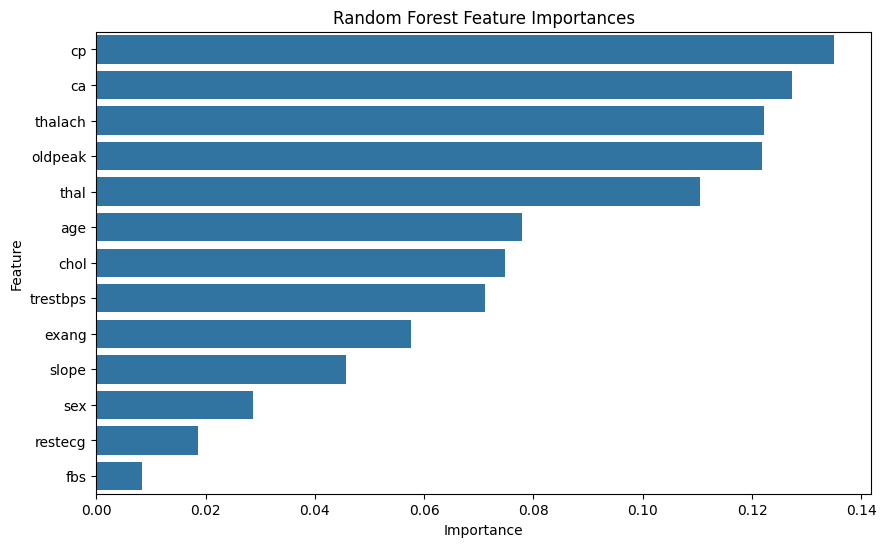

In [29]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importances')
plt.show()

In [30]:
# Step 5: Evaluate using cross-validation
dt_cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Decision Tree - 5-Fold CV Accuracy: {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std() * 2:.4f})")
print(f"Random Forest - 5-Fold CV Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

Decision Tree - 5-Fold CV Accuracy: 0.9756 (+/- 0.0370)
Random Forest - 5-Fold CV Accuracy: 0.9817 (+/- 0.0318)
